# Bricks and Board Code Challenge

## The Problem

I am in an open field with an endless supply of bricks. My hobby is stacking bricks up in equally-spaced columns of random heights.

I choose the number of columns randomly. It could be 10, or 27, or 63,972,152. I'm a patient guy and I like columns of bricks.

Each time, when I'm done, I lay a wooden board on top of the columns of bricks. I have access to a huge variety of board lengths, so I always choose one that starts exactly above the top of the first column, and stretches to exactly above the top of the last column, regardless of its angle.

It doesn't always touch the tops of those columns, of course. I chose the column heights randomly. Maybe on some occasions it rests on those, but in other cases it comes to rest on bricks anywhere in between them. It all depends on the height of the columns and where gravity dictates the board will sit. But in any case, these bricks are rough enough that the board never slides off, even at severe slopes.

Your job is to figure out, given the number of bricks in each column, the slope and y-intercept of my board.

Columns of bricks are provided in an array, where the array index is "x" and the value is "y".

## Forget The High School Line Formula Stuff?

Me too. Here's a quick refresher:

A straight line is defined by the formula y = mx + b:

* **x:** the column number, starting from 0
* **y:** the height of the board, in bricks, at that column
* **m:** the slope of the board, or "rise over run": take two points the board is touching, x1,y1 and x2,y2, and the slope is (y2 - y1) / (x2 - x1).
* **b:** y-intercept: how high the board is from the ground, in bricks, at column 0

> _Important Note:_ For simplicity, let's ignore the fact that any angled board will have a slightly varying height over the width of a stack of bricks. The board's height (y) when it's touching a brick is equal to the number of bricks beneath it.

## Here's an example

`[2, 14, 8, 94, 300, 210, 200, 99, 14, 12]`

Laying a board on top of this, it comes to rest on x=4 y=300, and x=6 y=200. ("Not 300 and 210?!" Some of you are thinking? Nope, if it rested on 210, the slope would be too severe that it would fall BELOW the top of the 200 stack. For real, check the math. This problem isn't as simple as it sounds.)

Slope is rise (y2 - y1) divided by run (x2 - x1). So: (200 - 300) / (6 - 4) = -50.

y-intercept can then be found by plugging the slope into the y=mx+b line equation for either of those resting points above. I'll pick x=6 y=200:

```
200 = -50 * 6 + b
200 = -300 + b
b = 200 - -300
b = 500
```

So with those stacks, slope is **-50** and y-intercept is **500**.

Write me a function that outputs those two variables given any input array. No gravity-defying boards!

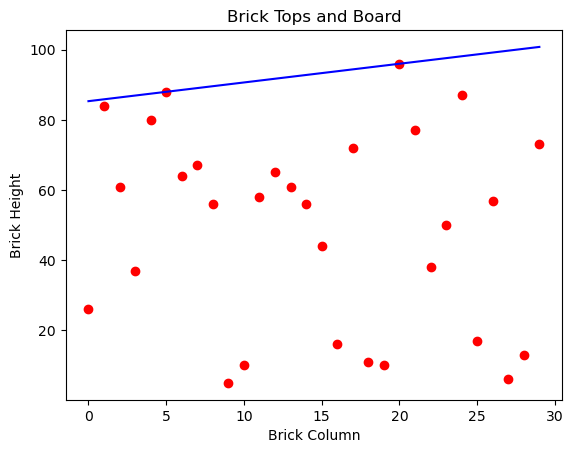

Data: [26, 84, 61, 37, 80, 88, 64, 67, 56, 5, 10, 58, 65, 61, 56, 44, 16, 72, 11, 10, 96, 77, 38, 50, 87, 17, 57, 6, 13, 73]
Slope: 0.5333333333333333
Y-Intercept: 85.33333333333333


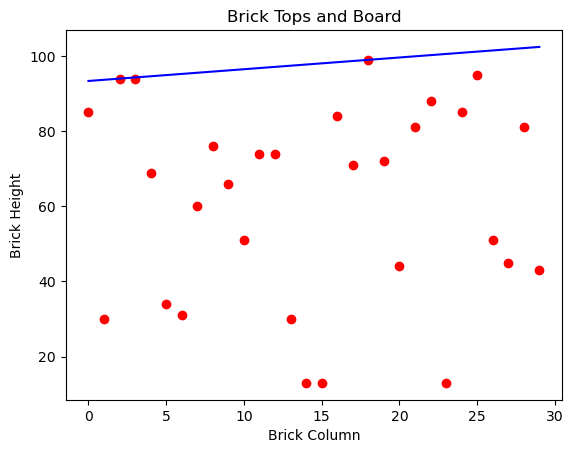

Data: [85, 30, 94, 94, 69, 34, 31, 60, 76, 66, 51, 74, 74, 30, 13, 13, 84, 71, 99, 72, 44, 81, 88, 13, 85, 95, 51, 45, 81, 43]
Slope: 0.3125
Y-Intercept: 93.375


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Function to generate an array of random integers


def generate_random_array(data_length, max_value):
    return np.random.randint(0, max_value, data_length)

# Function to plot the data and the line


def plot_data_with_line(arr, slope, y_intercept):
    x = np.arange(len(arr))
    y = arr

    plt.scatter(x, y, color='red', label='Brick Column Tops')
    plt.plot(x, slope * x + y_intercept, color='blue', label='Board')

    plt.xlabel('Brick Column')
    plt.ylabel('Brick Height')
    plt.title('Brick Tops and Board')
    plt.show()

# Function to calculate the slope and y-intercept


def calculate_slope_intercept(arr):
    if len(arr) < 2:
        raise ValueError("Array must have at least two elements")

    middle = (len(arr)-1)/2

    def cross(a, b, c):
        # Given three points a, b, and c, we want to detemine whether the path
        # from a to c through b requires a clockwise of counter-clockwise turn.
        # Use the cross product.  If (b - a) X (c - a) is positive, it's CCW.
        # If negative, it's CW.  If 0, the points are all in a line.
        ax, ay = a
        bx, by = b
        cx, cy = c
        return (bx - ax) * (cy - ay) - (by - ay) * (cx - ax)

    hull = []  # points in the upper convex hull
    keep = None
    for px, py in enumerate(arr):
        # As you move left to right through the points, keep points that form a
        # CW path.  If you encounter a CCW turn, pop the stack until it is
        # making only CW paths again.  This is part of the Monotone Chaining algorithm
        # for finding the upper convex hull of the points.

        # Throw out points where cross product >= 0, which means CCW or straight.
        while len(hull) >= 2 and cross(hull[-2], hull[-1], (px, py)) >= 0:
            del hull[-1]
        hull.append((px, py))

        if len(hull) >= 2:
            # keep the last 2 points on the hull if they're on opposite sides of the middle
            if hull[-2][0] <= middle and hull[-1][0] >= middle:
                keep = (hull[-2], hull[-1])

    x1, y1 = keep[0]
    x2, y2 = keep[1]
    slope = (y2 - y1) / (x2 - x1)
    y_intercept = y1 - slope * x1

    return slope, y_intercept


if __name__ == "__main__":

    # Calling the functions to visualize the output
    data_length = 30
    max_value = 100
    random_array = generate_random_array(data_length, max_value)
    slope, y_intercept = calculate_slope_intercept(random_array)
    plot_data_with_line(random_array, slope, y_intercept)
    print("Data:", json.dumps(random_array.tolist()))
    print("Slope:", slope)
    print("Y-Intercept:", y_intercept)

Text(0, 0.5, 'Time Taken')

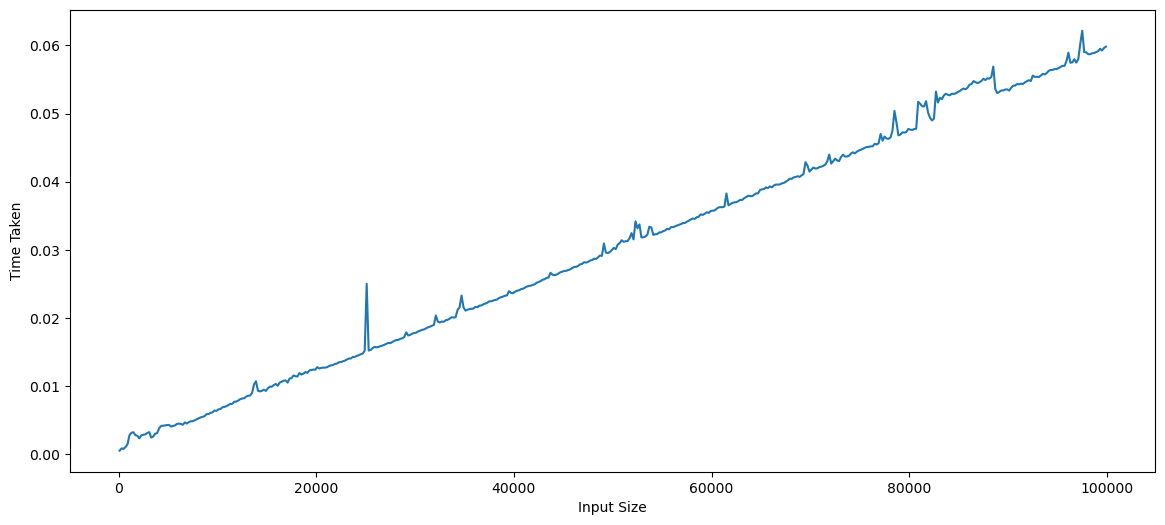

In [3]:
import time

input_sizes = range(100, 100000, 200)
samples = 1
times = []
for n in input_sizes:
    total = 0
    for j in range(samples):
        start_time = time.time()
        random_array = generate_random_array(n, 100)
        slope, y_intercept = calculate_slope_intercept(random_array)
        end_time = time.time()
        total += (end_time - start_time)
    times.append(total / samples)

plt.figure(figsize=(14, 6))
plt.plot(input_sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Time Taken')